<a href="https://colab.research.google.com/github/viznuv/retention_funnel/blob/main/retentioneering_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Retentioneering version: 3.3.0
Data sample:
                            user_id           timestamp            event
0  6fe9147ebeb41c766a6f649239cce40b 2021-01-01 00:00:01  loyalty_program
1  148870bfa84777898359aaa8e120a373 2021-01-01 00:00:01          landing
2  ac3948ea43cb39cdc4e739004d252d0b 2021-01-01 00:00:09          landing
3  48a0df50d7ed1fcaaddf742b828b85e5 2021-01-01 00:00:15             home
4  48a0df50d7ed1fcaaddf742b828b85e5 2021-01-01 00:00:15            login 

Original time range: 2021-01-01 00:00:01 to 2021-03-20 15:55:54

After restricting to first 20 days:
  Time range: 2021-01-01 00:00:01 to 2021-01-20 23:59:58
  Total events: 559939
  Unique users: 82815


Basic description of the stream:
                                                    value
category          metric                                 
overall           unique_users                       8281
                  unique_events                        39
                  eventstream_start   2021-01-

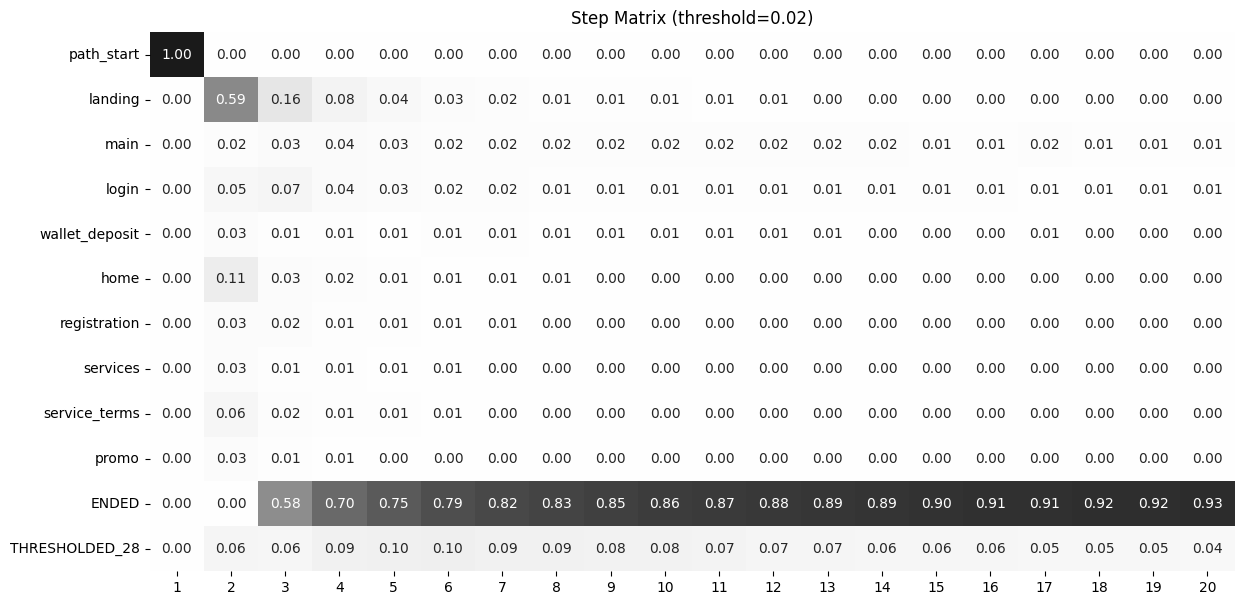

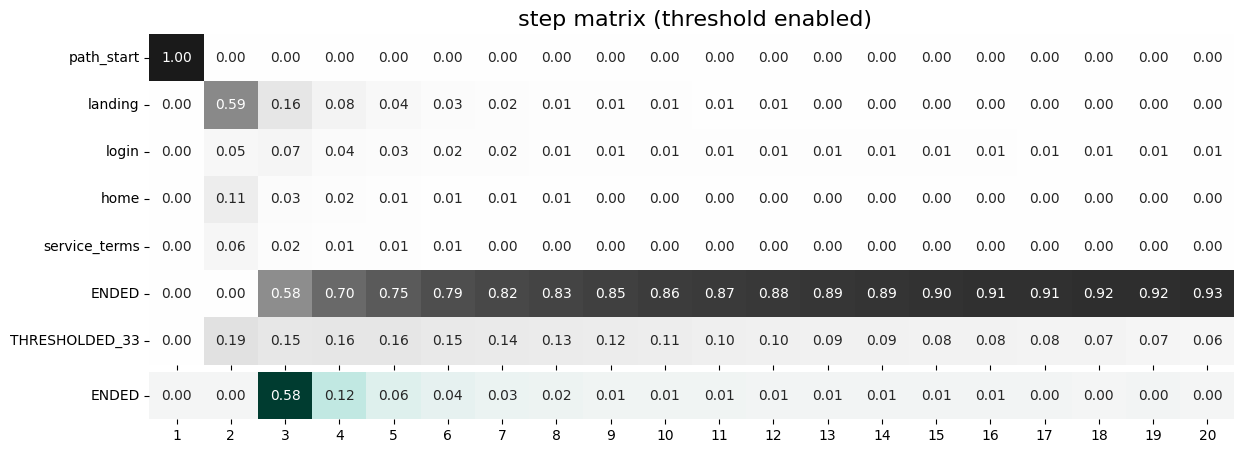

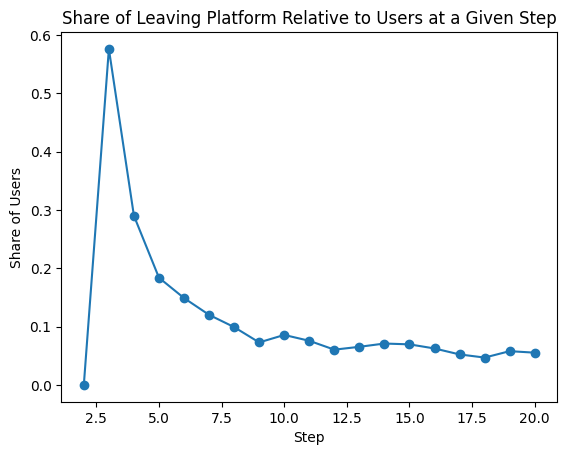

After dropping short paths:
                                                    value
category          metric                                 
overall           unique_users                       1488
                  unique_events                        39
                  eventstream_start   2021-01-01 00:17:33
                  eventstream_end     2021-01-20 23:59:21
                  eventstream_length     19 days 23:41:48
path_length_time  mean                    3 days 07:33:43
                  std                     5 days 06:05:02
                  median                  0 days 05:25:52
                  min                     0 days 00:00:14
                  max                    19 days 21:30:29
path_length_steps mean                              32.31
                  std                                46.6
                  median                             17.0
                  min                                   8
                  max                       

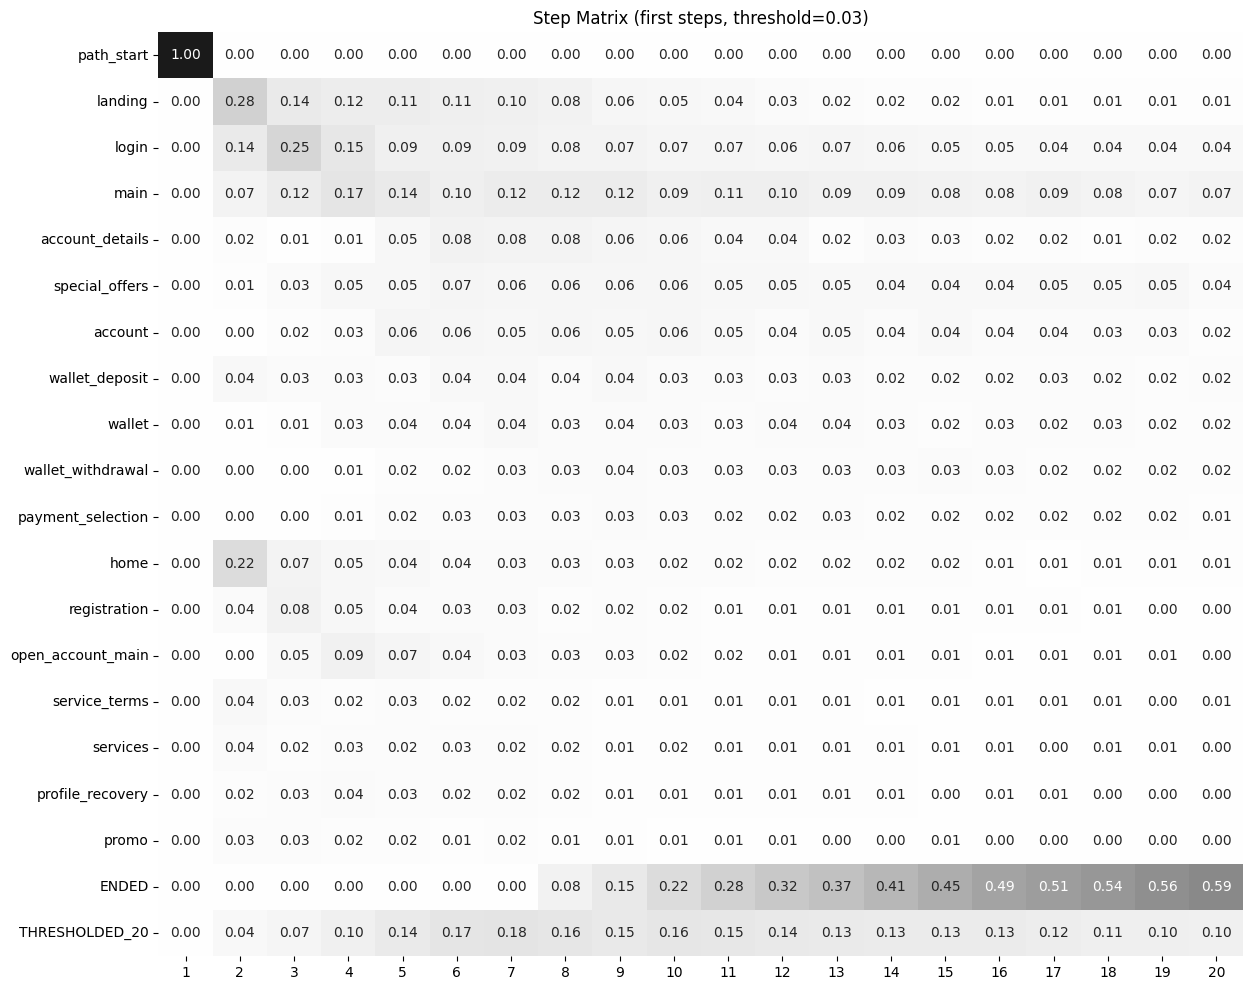

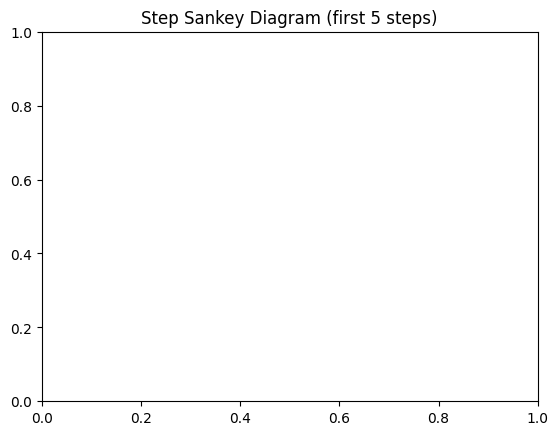

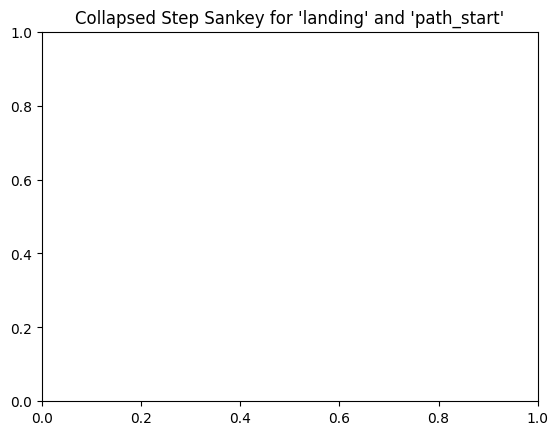

27.5% of users who start with a landing page stay on the landing page only



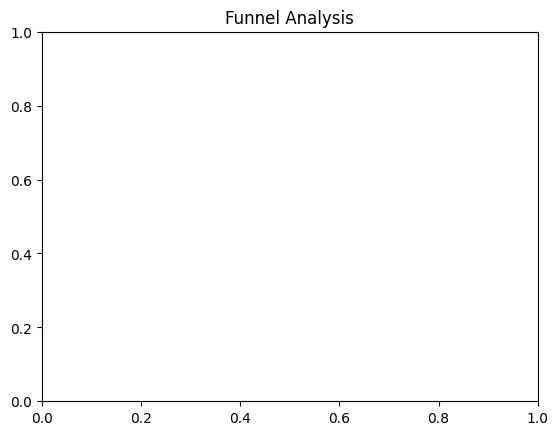

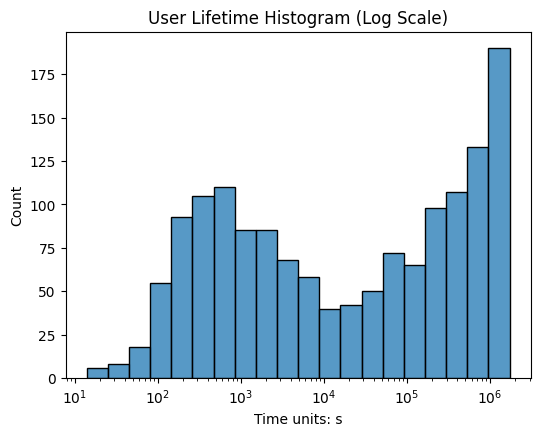

Step Matrix for short-path users:


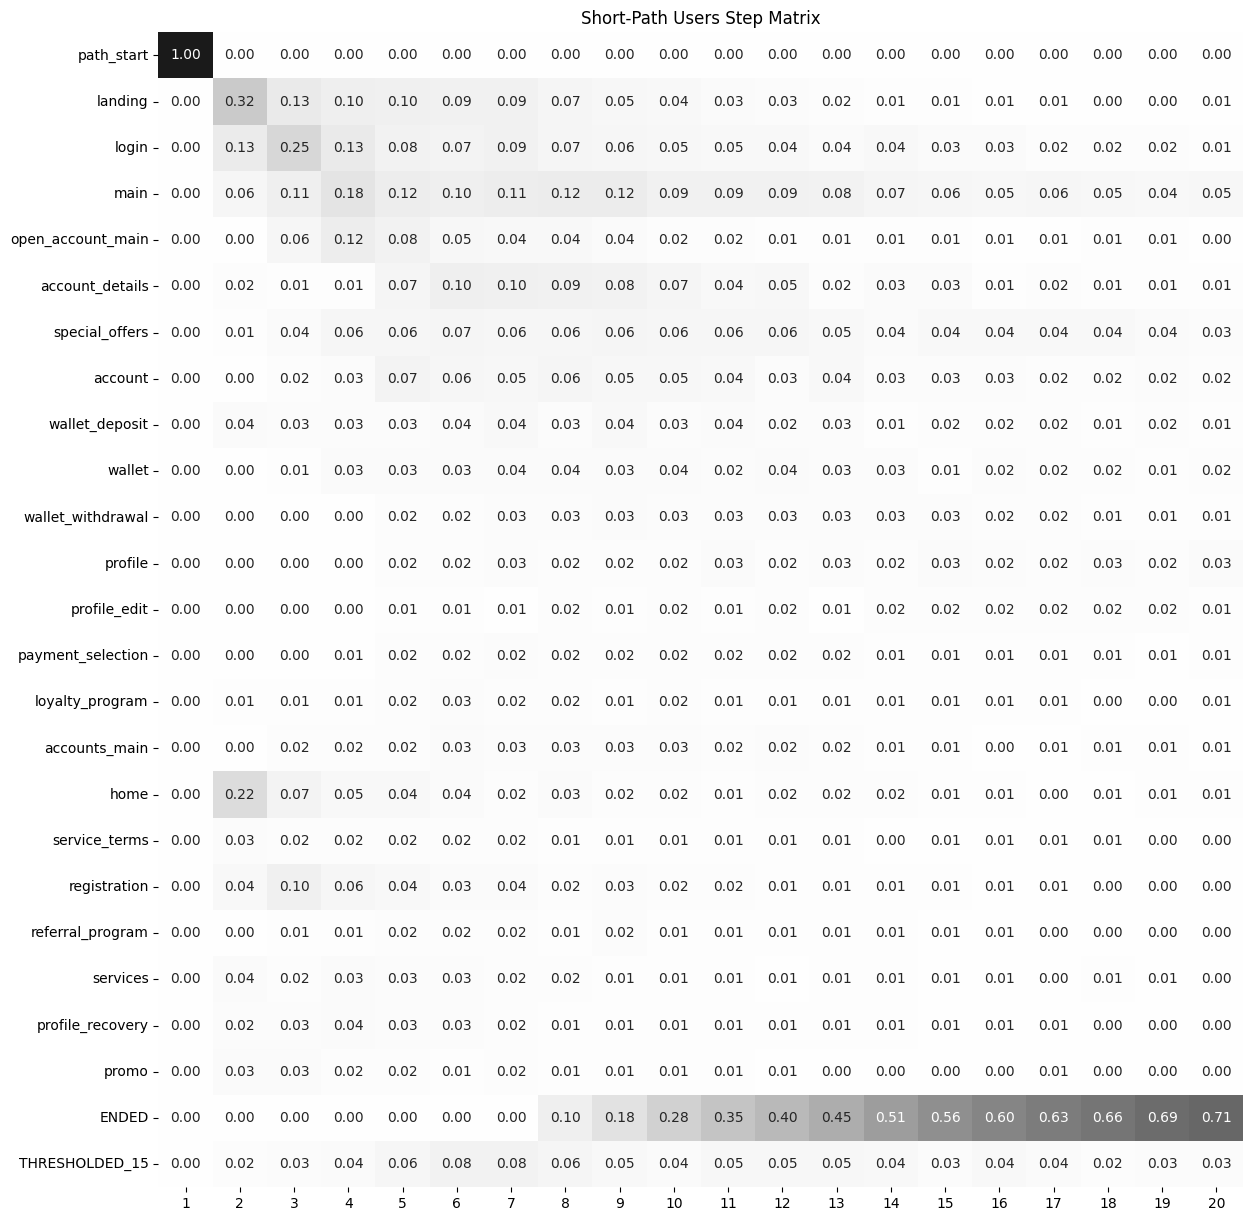

Step Matrix for long-path users:


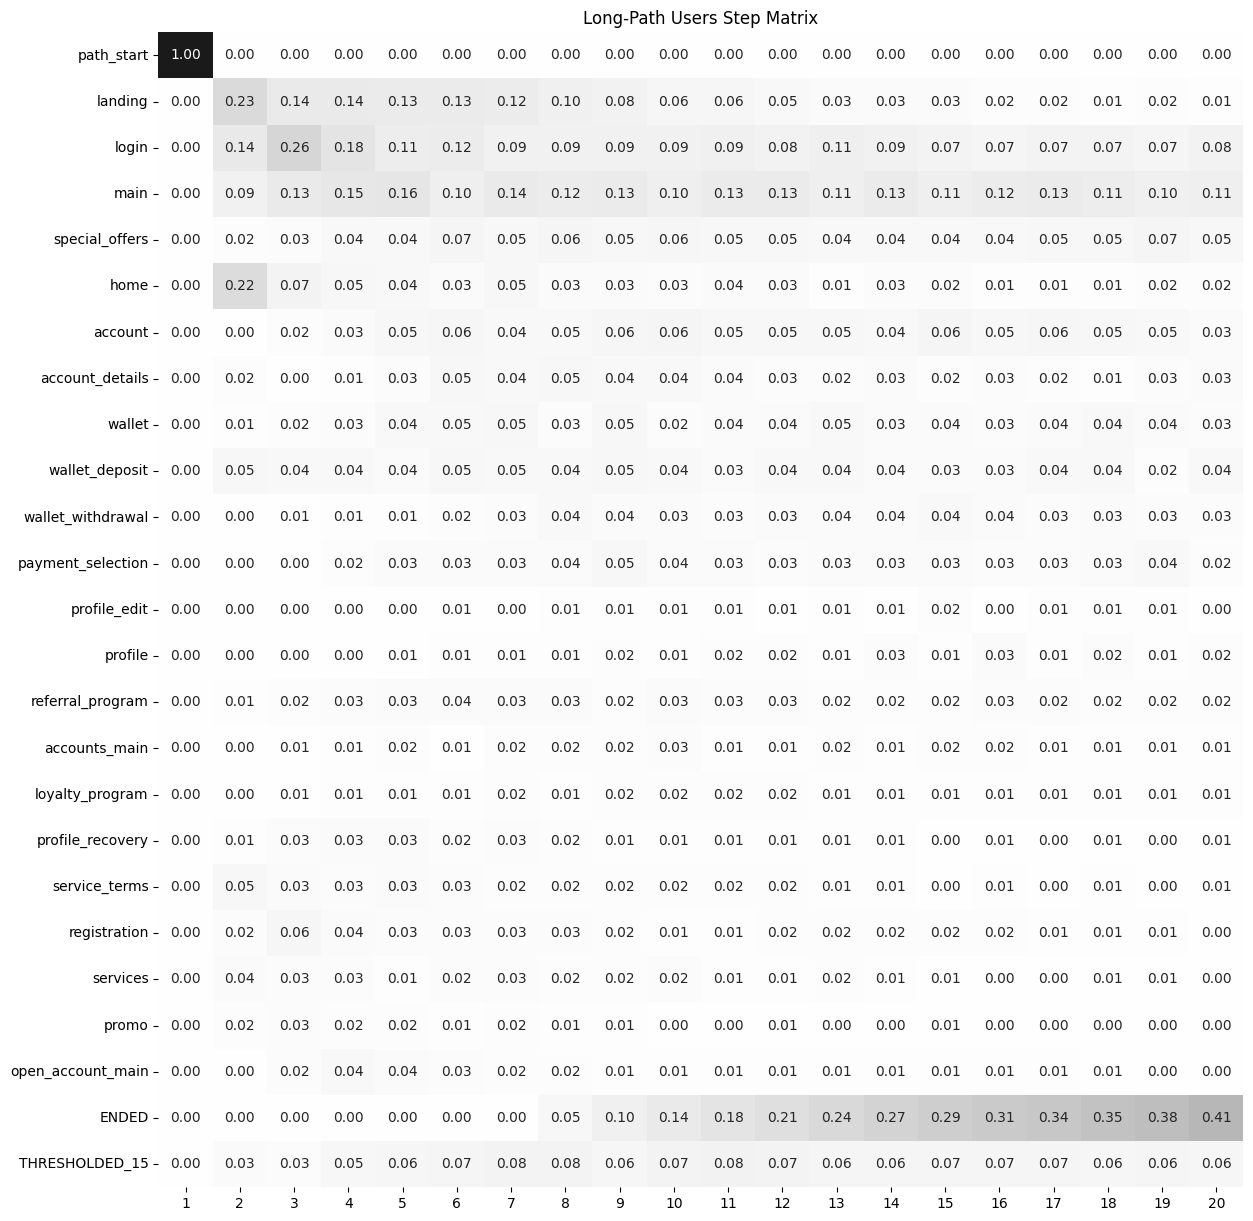

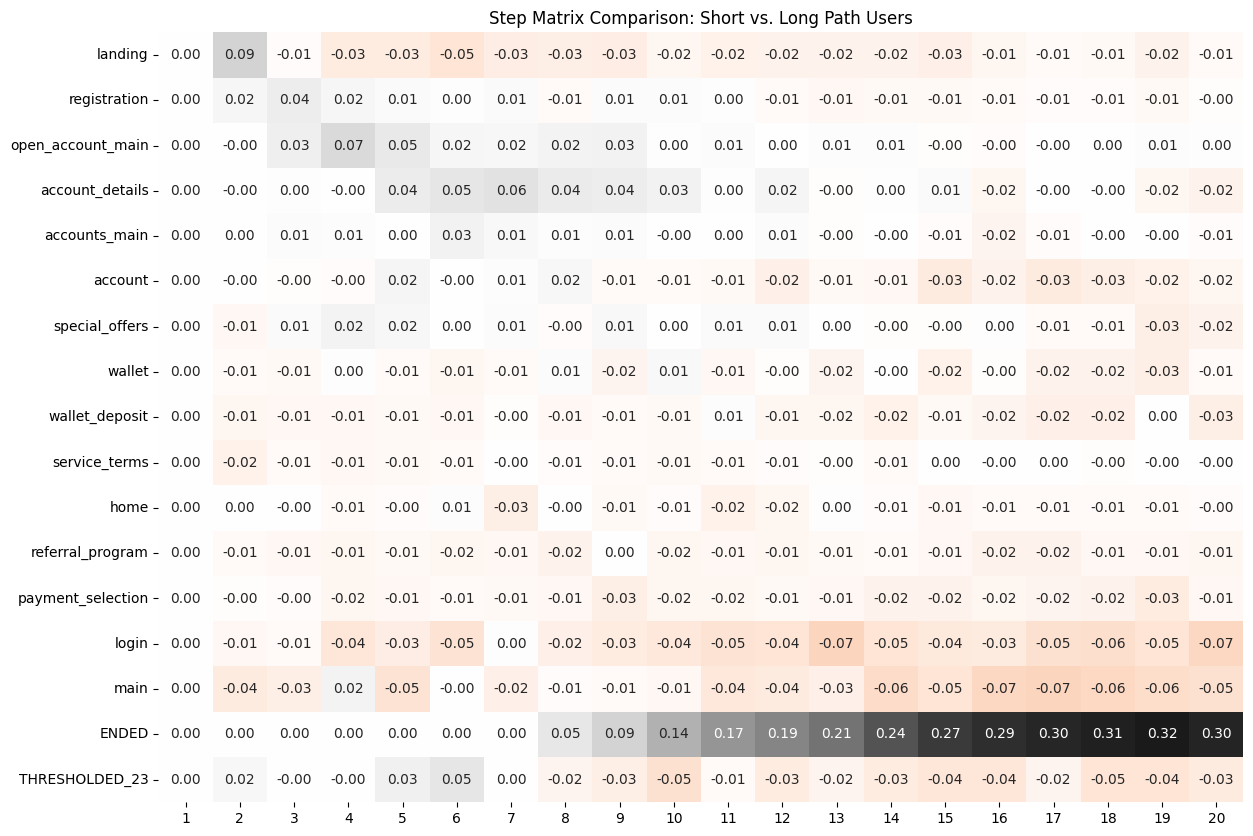

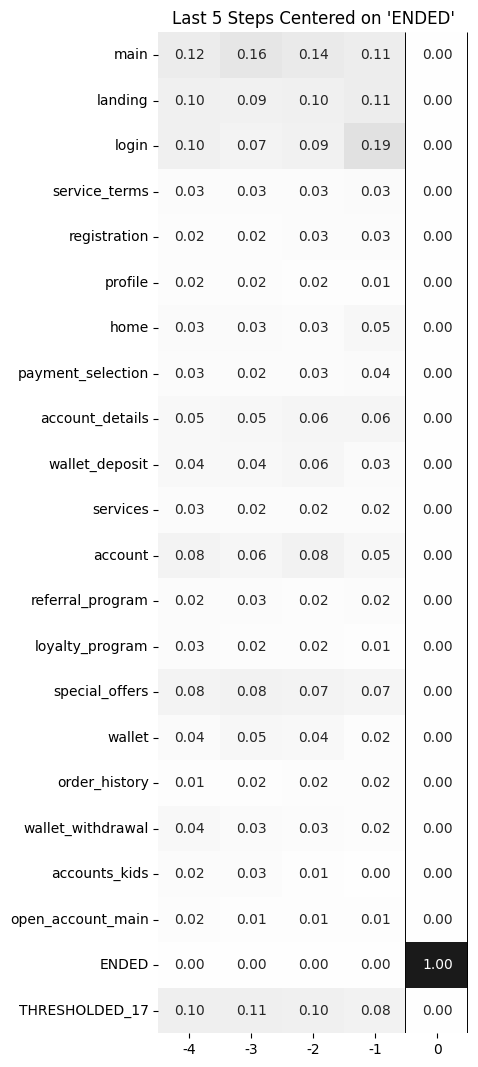

Really long path stream description:
                                                    value
category          metric                                 
overall           unique_users                       1120
                  unique_events                        39
                  eventstream_start   2021-01-01 00:00:15
                  eventstream_end     2021-01-20 23:57:58
                  eventstream_length     19 days 23:57:43
path_length_time  mean                   13 days 17:35:20
                  std                     4 days 04:38:09
                  median                 14 days 16:39:49
                  min                     4 days 04:49:37
                  max                    19 days 23:43:19
path_length_steps mean                             124.69
                  std                              150.66
                  median                             88.0
                  min                                   8
                  max              

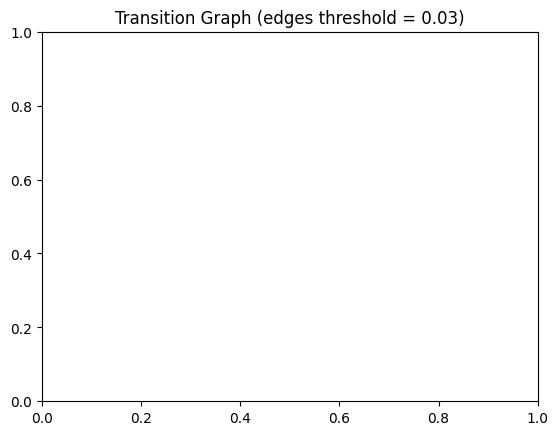

/usr/local/lib/python3.11/dist-packages/retentioneering/tooling/clusters/clusters.py:922: UserWarning:

FixedFormatter should only be used together with FixedLocator



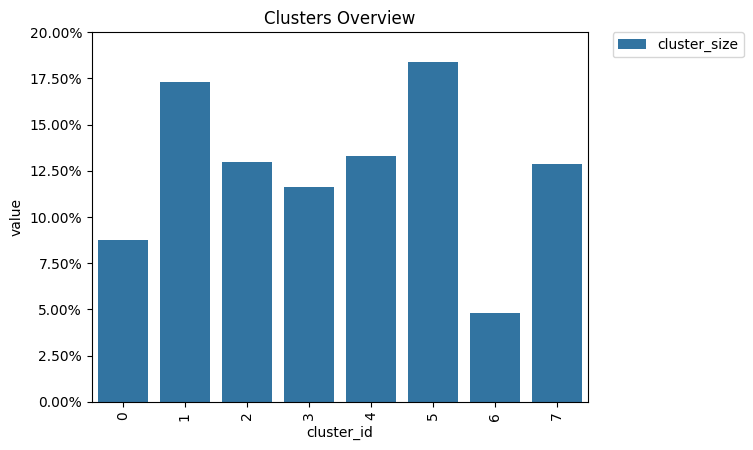

/usr/local/lib/python3.11/dist-packages/retentioneering/tooling/clusters/clusters.py:247: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.11/dist-packages/retentioneering/tooling/clusters/clusters.py:922: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.11/dist-packages/retentioneering/tooling/clusters/clusters.py:247: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.11/dist-packages/retentioneering/tooling/clusters/clusters.py:922: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.11/dist-packages/retentioneering/tooling/clusters/clusters.py:247: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

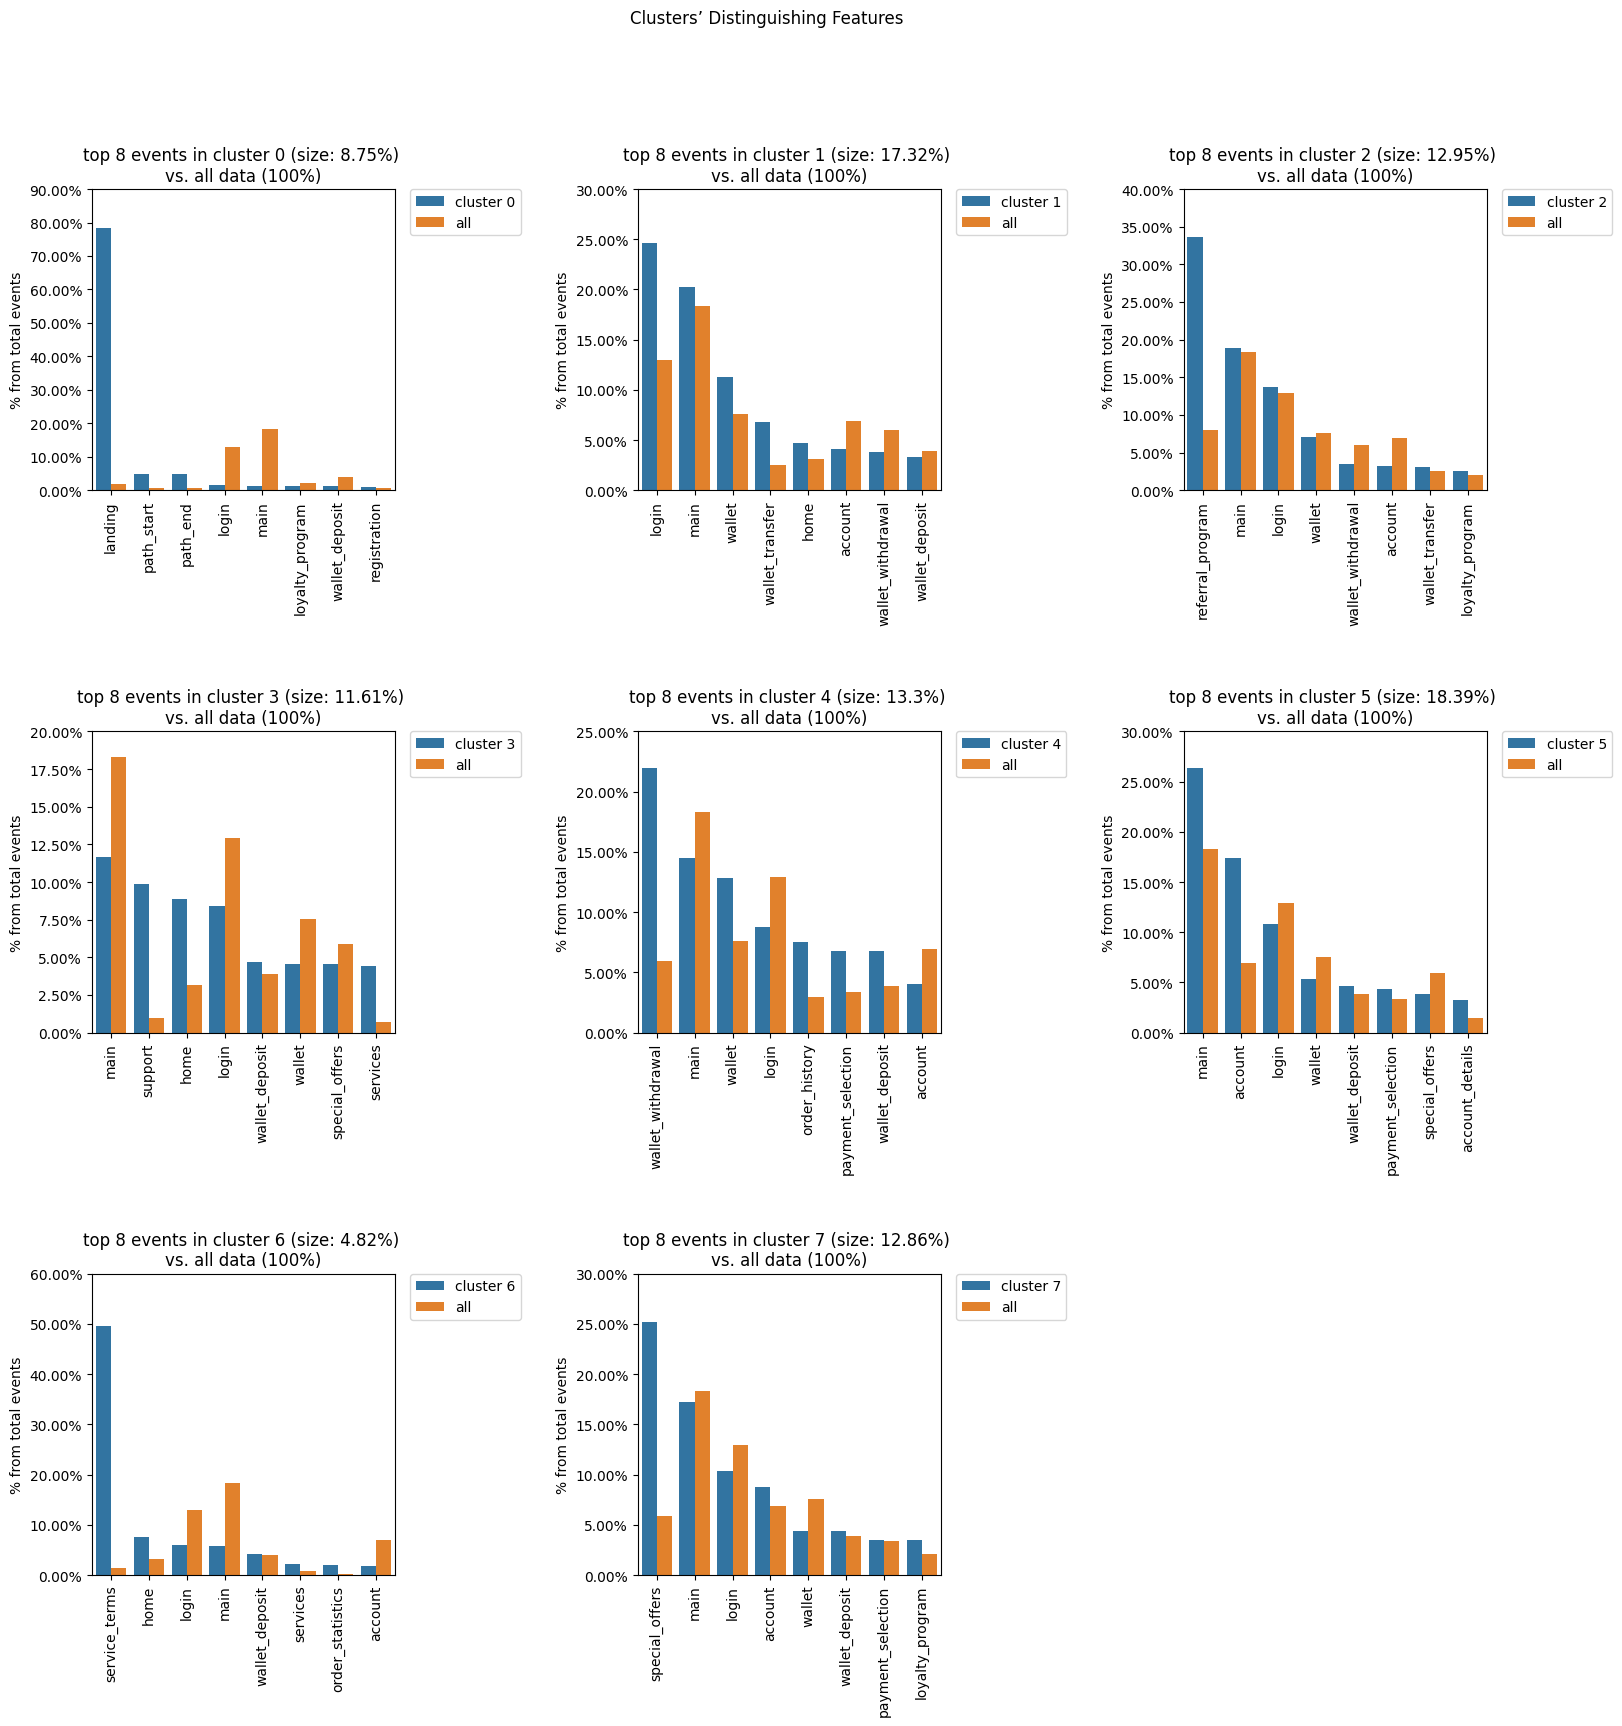

/usr/local/lib/python3.11/dist-packages/retentioneering/tooling/clusters/clusters.py:922: UserWarning:

FixedFormatter should only be used together with FixedLocator



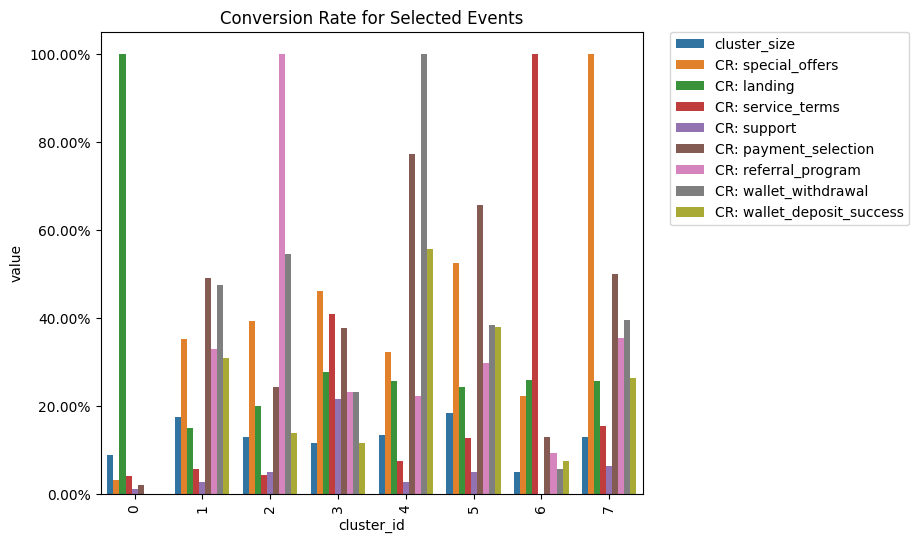

/usr/local/lib/python3.11/dist-packages/retentioneering/tooling/clusters/clusters.py:247: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.11/dist-packages/retentioneering/tooling/clusters/clusters.py:922: UserWarning:

FixedFormatter should only be used together with FixedLocator



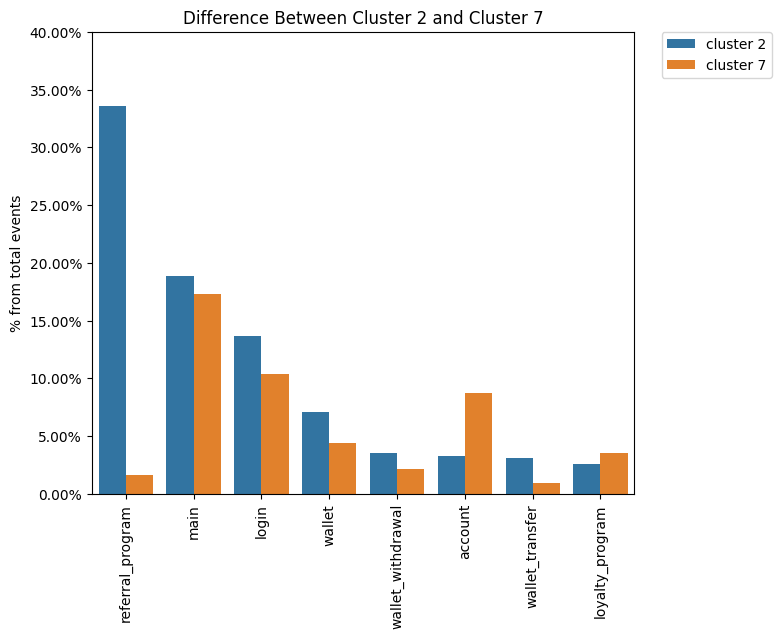

/usr/local/lib/python3.11/dist-packages/retentioneering/tooling/clusters/clusters.py:922: UserWarning:

FixedFormatter should only be used together with FixedLocator



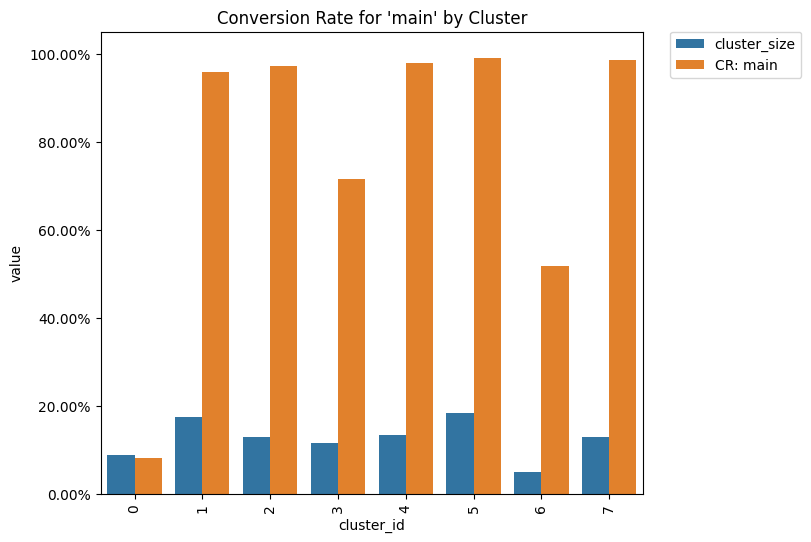

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



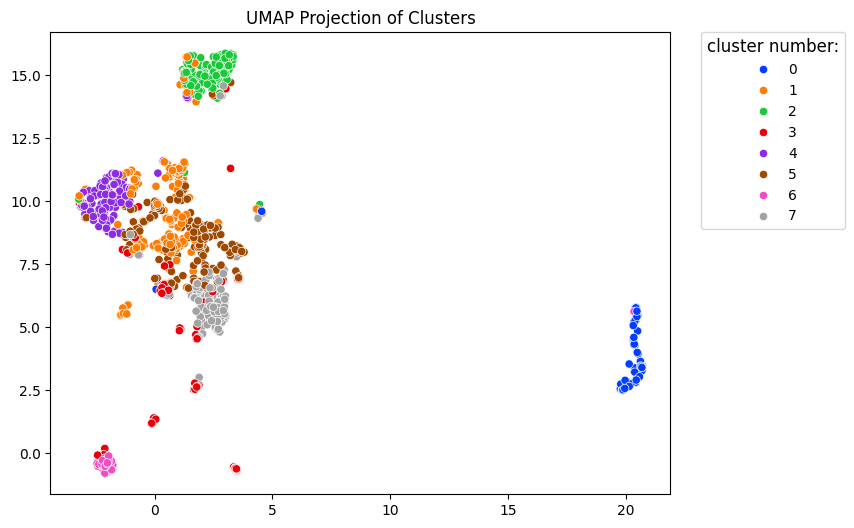



Step matrix for users in cluster 0 vs. rest:


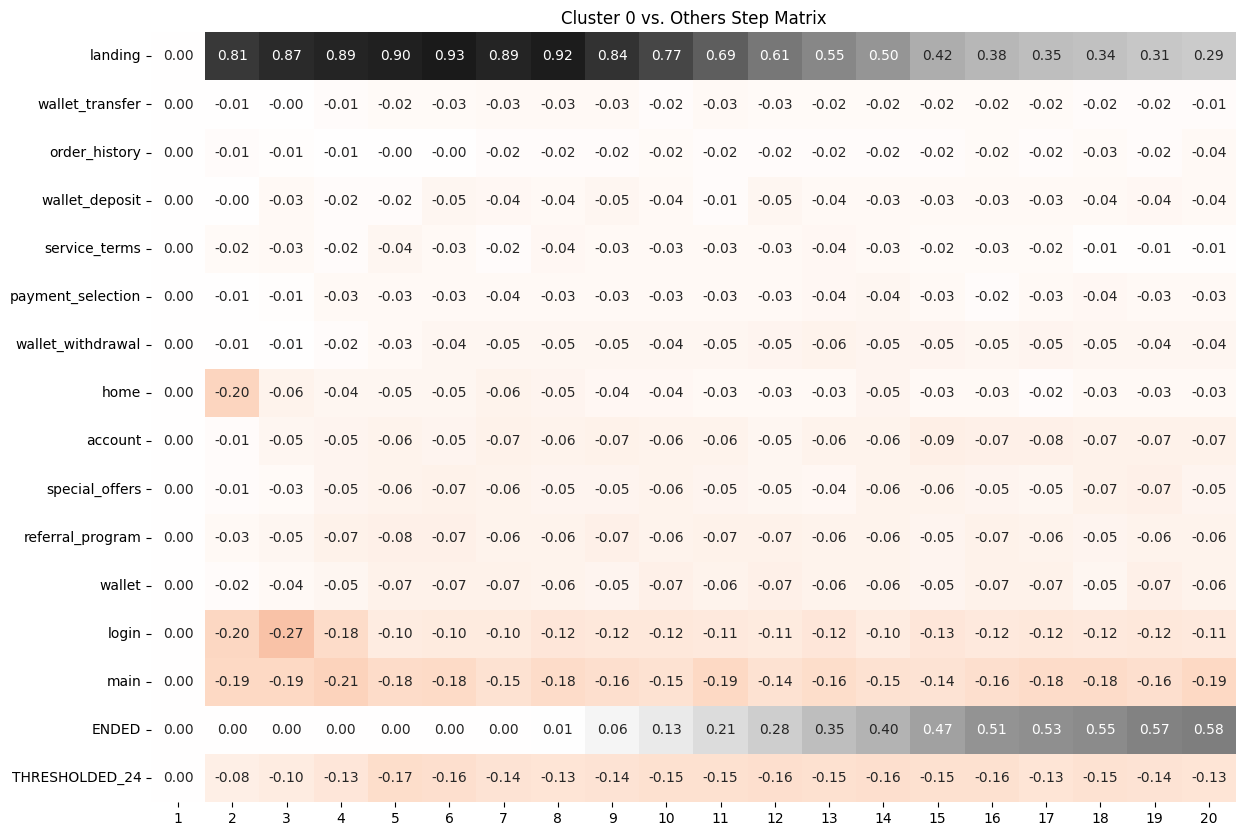



Step matrix for users in cluster 1 vs. rest:


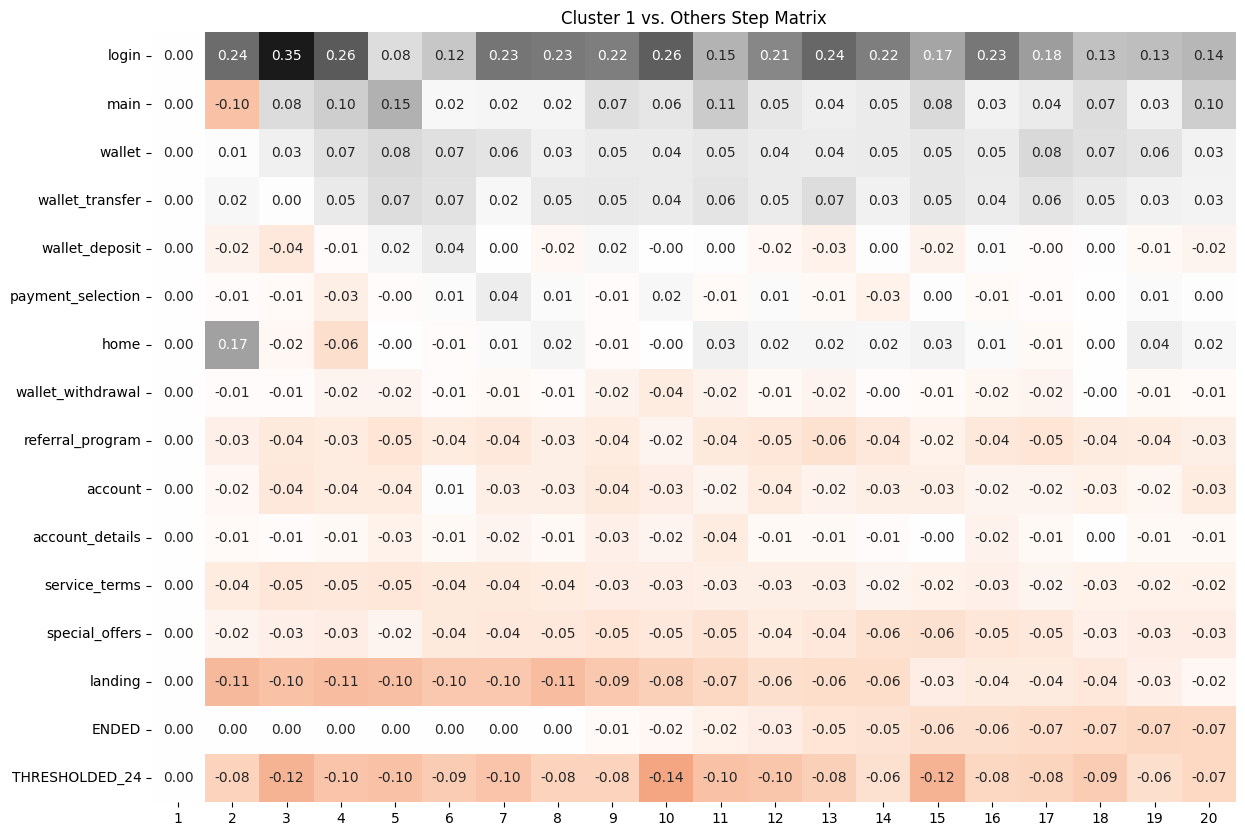



Step matrix for users in cluster 2 vs. rest:


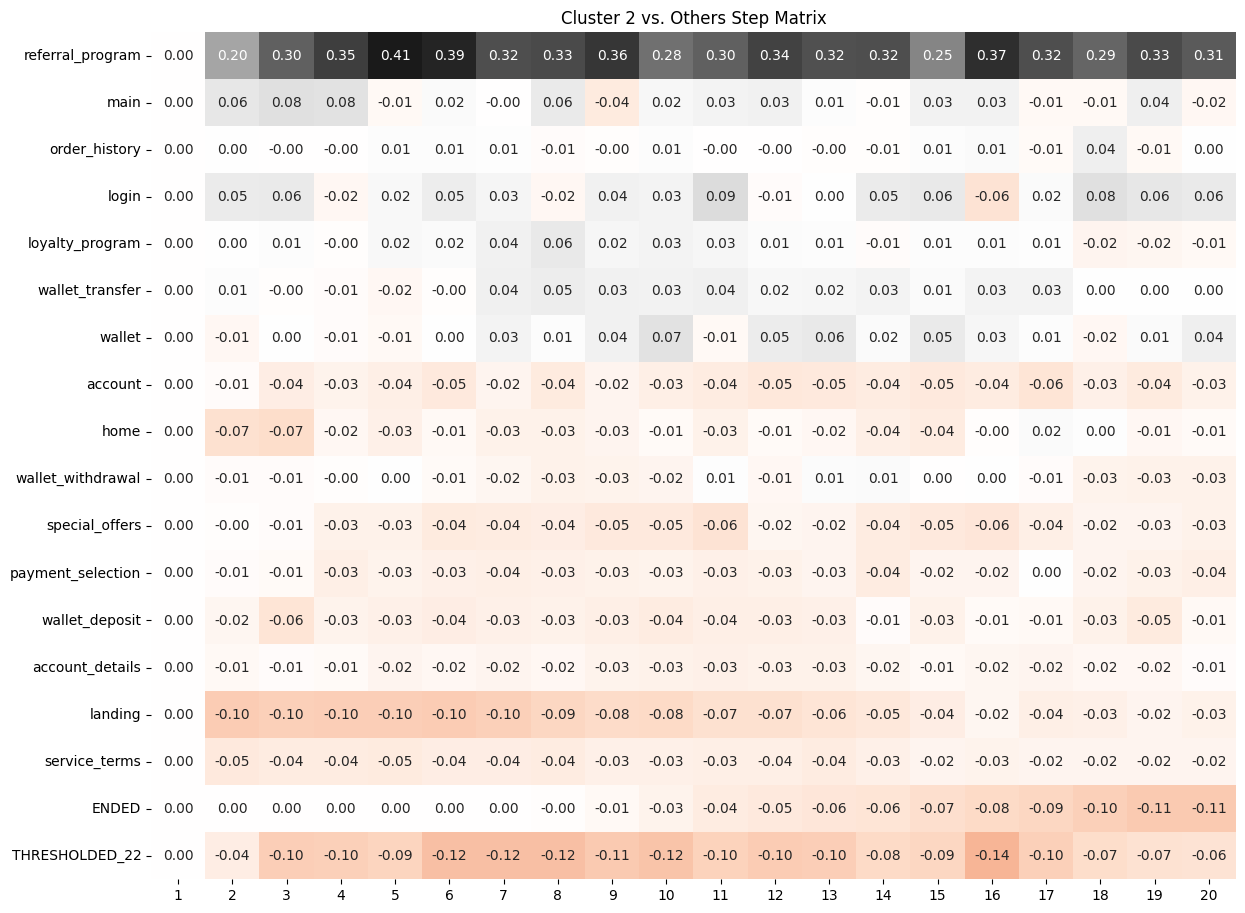



Step matrix for users in cluster 3 vs. rest:


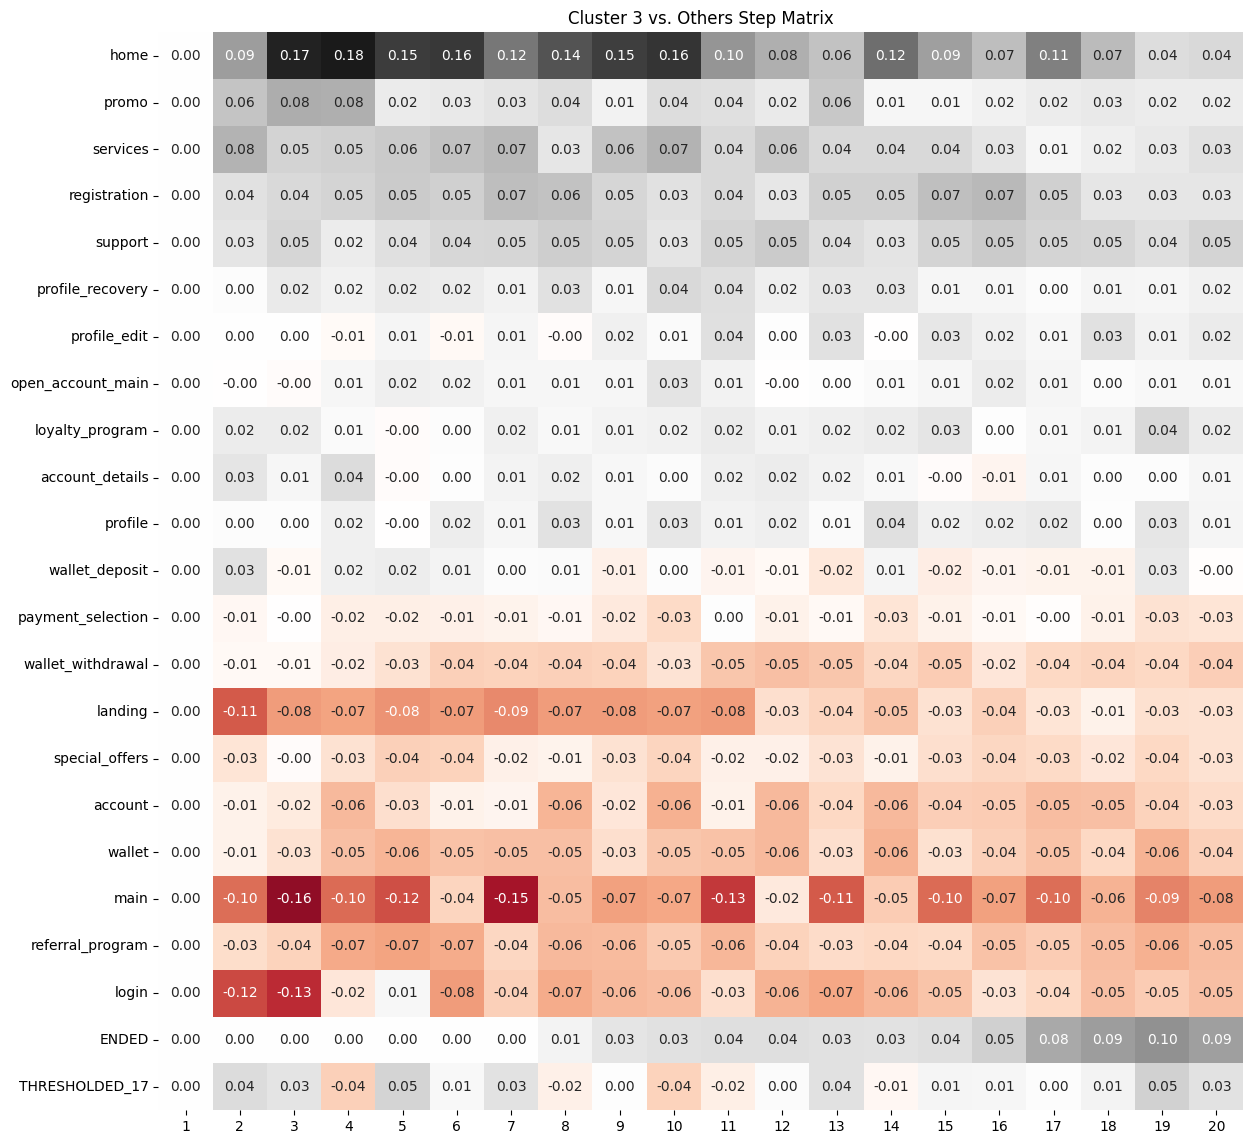



Step matrix for users in cluster 4 vs. rest:


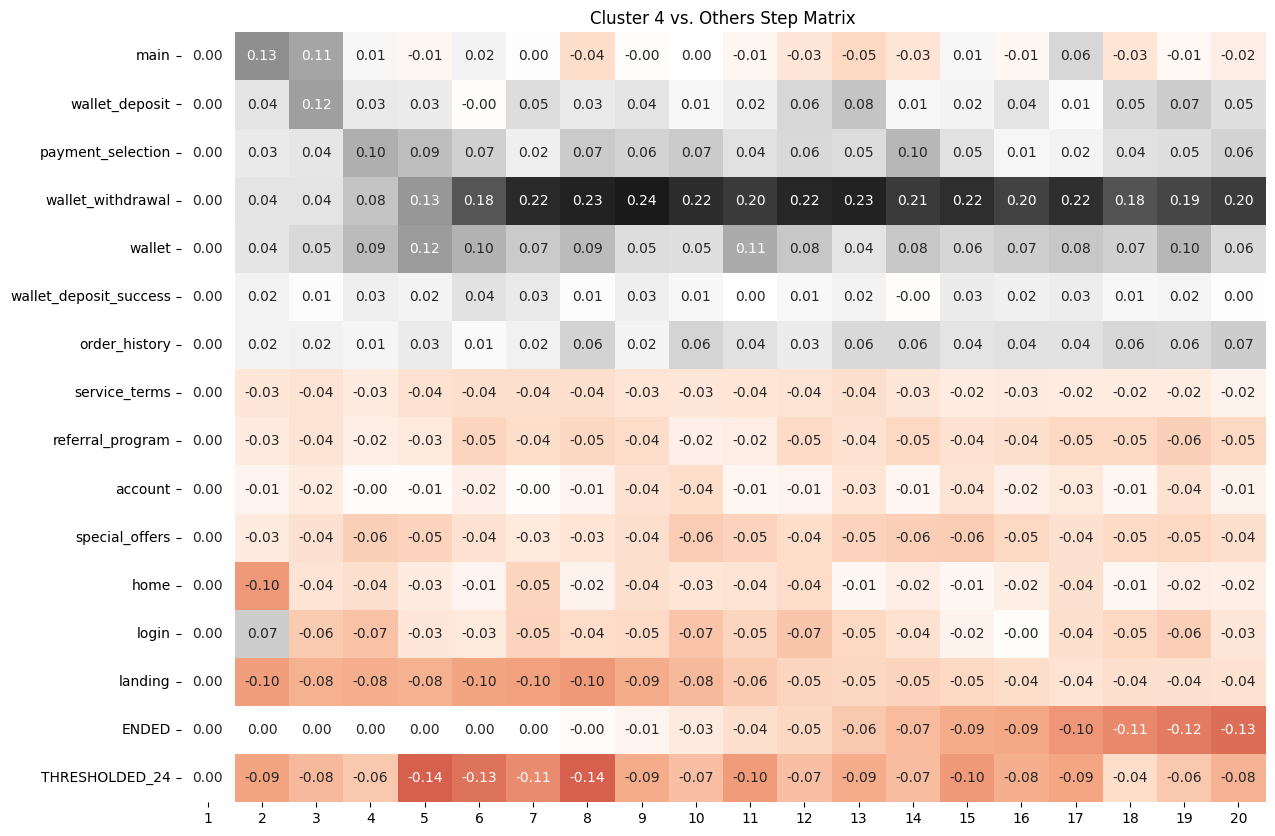



Step matrix for users in cluster 5 vs. rest:


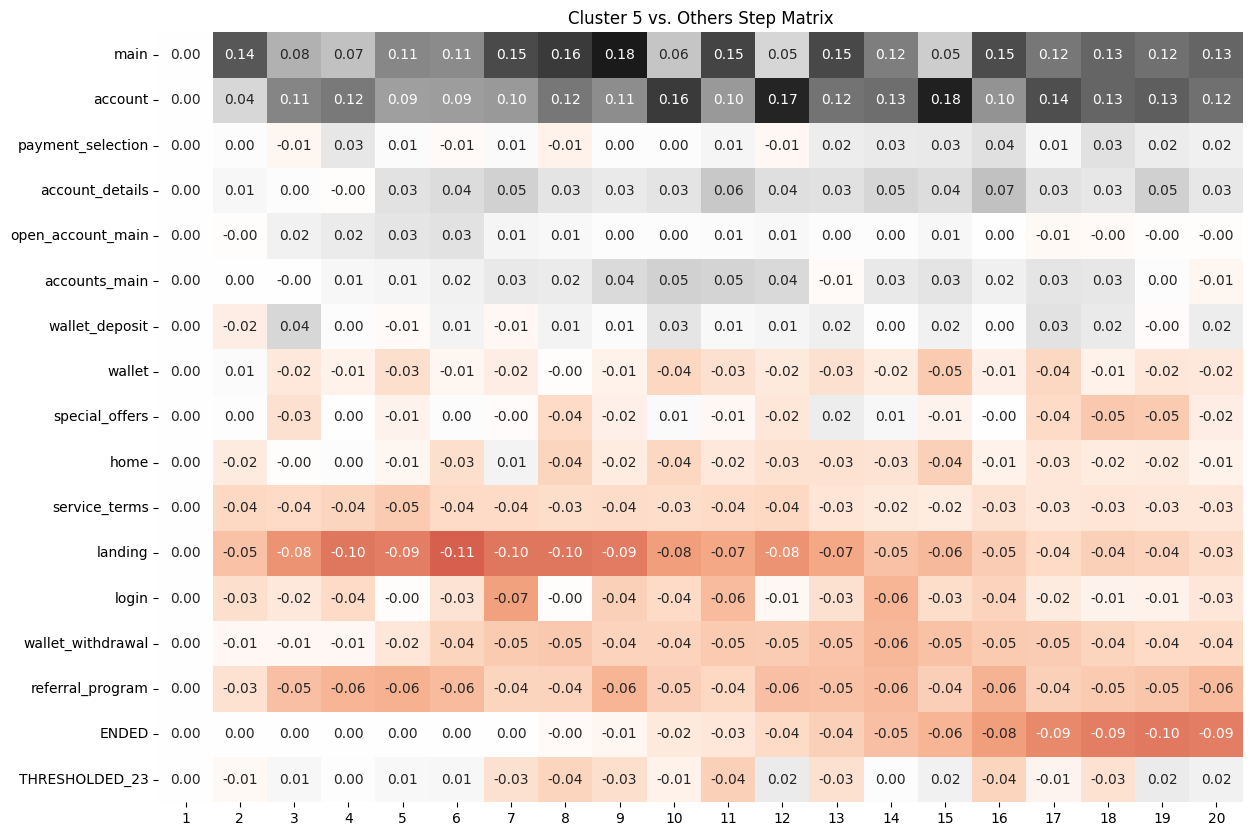



Step matrix for users in cluster 6 vs. rest:


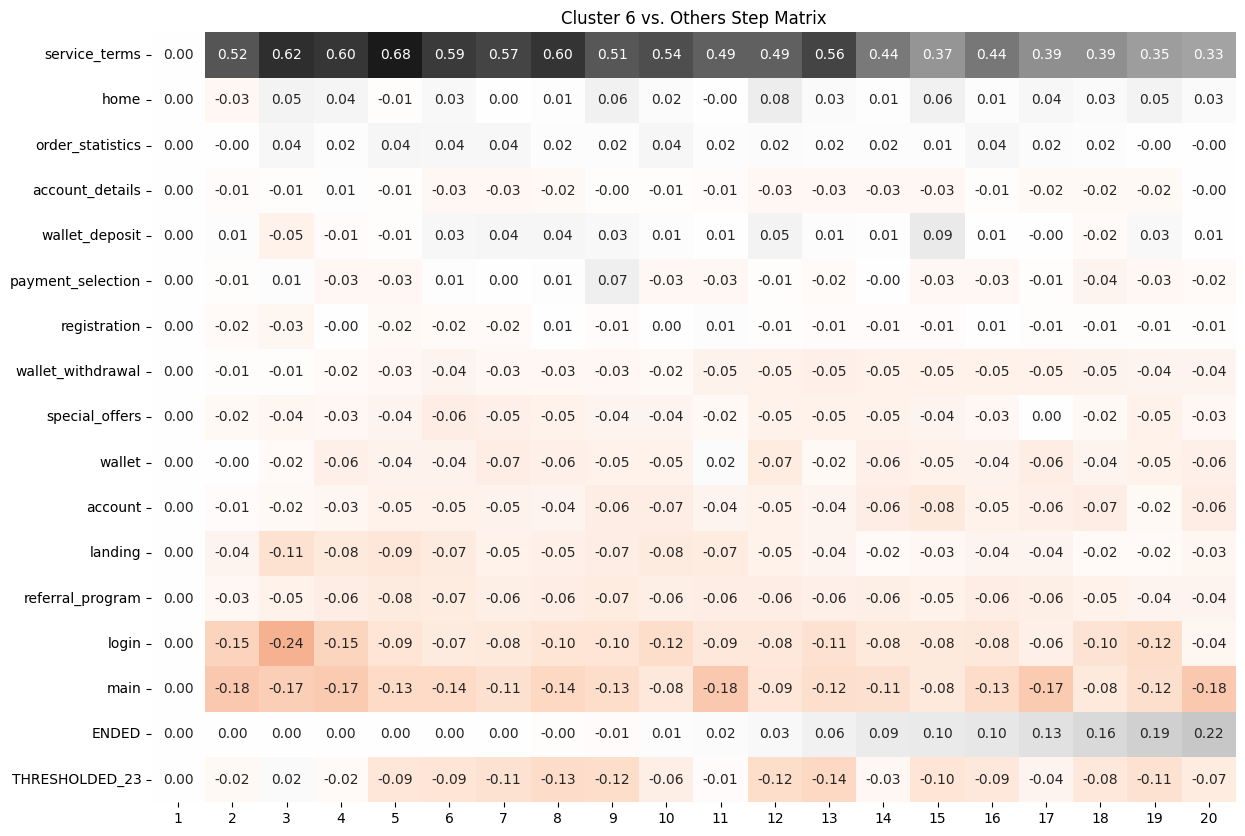



Step matrix for users in cluster 7 vs. rest:


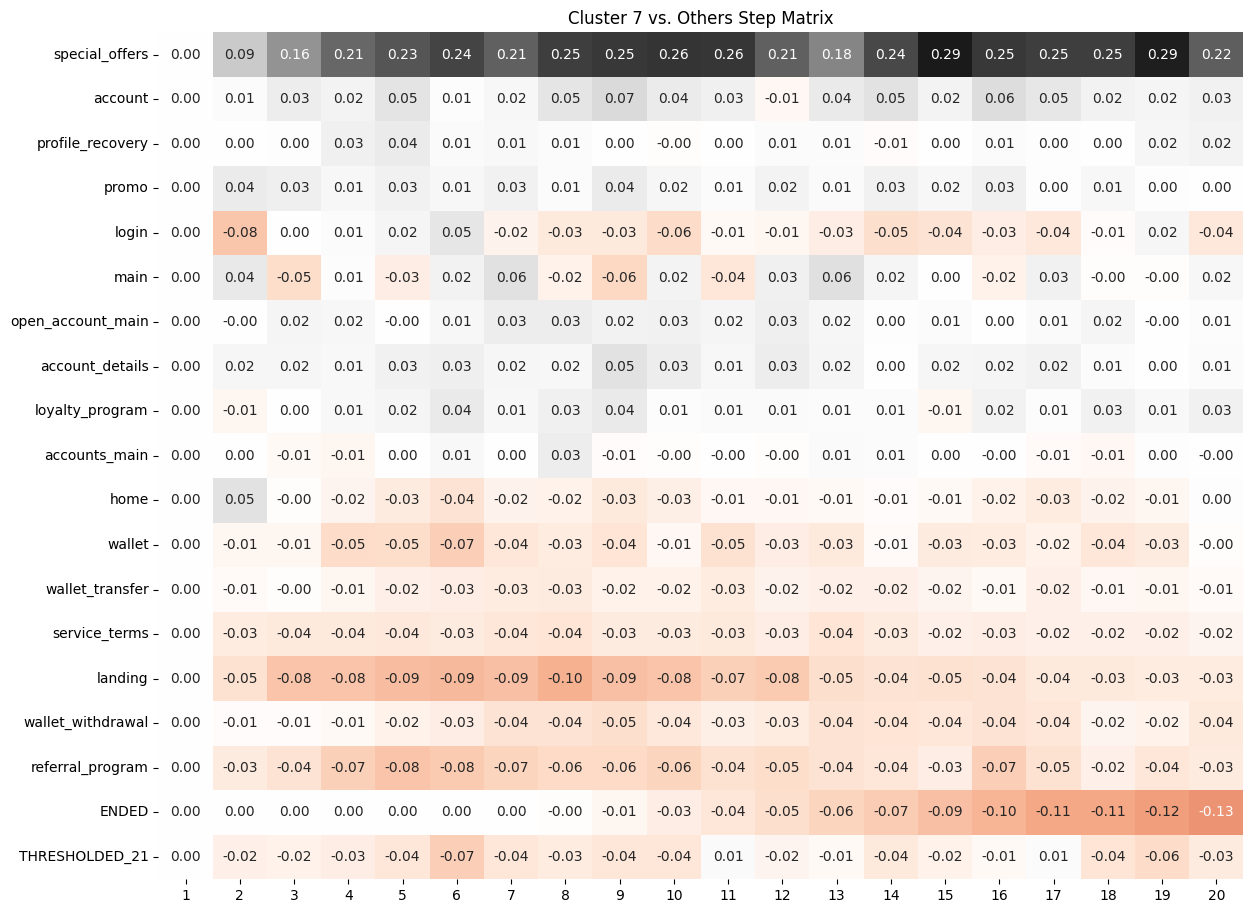

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the retentioneering library and check its version.
import retentioneering
print("Retentioneering version:", retentioneering.__version__)

from retentioneering.eventstream import Eventstream
from datetime import timedelta

# =============================================================================
# 1. Load the Data from .dat file and Restrict to the First 20 Days
# =============================================================================
# Adjust the filename/path if necessary.
data = pd.read_csv('e-wallet.dat', parse_dates=['timestamp'])
print("Data sample:")
print(data.head(), "\n")

print("Original time range:", data['timestamp'].min(), "to", data['timestamp'].max())

# Restrict the data to the first 20 days (relative to the minimum timestamp)
start_date = data['timestamp'].min()
end_date = start_date + pd.Timedelta(days=20)
data = data[data['timestamp'] < end_date].copy()
print("\nAfter restricting to first 20 days:")
print("  Time range:", data['timestamp'].min(), "to", data['timestamp'].max())
print("  Total events:", len(data))
print("  Unique users:", data['user_id'].nunique())
print("\n")

# =============================================================================
# 2. Create the Eventstream
# =============================================================================
# (The tutorial example takes 10% of users to speed up processing. For larger datasets this is helpful.)
stream = Eventstream(data, user_sample_size=0.1, user_sample_seed=42)

# Show basic statistics about the event stream.
print("Basic description of the stream:")
print(stream.describe(), "\n")

# =============================================================================
# 3. First Look – Step Matrix Analysis
# =============================================================================
# Plot a step matrix to see the distribution of events along the trajectory.
stream.step_matrix(threshold=0.02)
plt.title("Step Matrix (threshold=0.02)")
plt.show()

# =============================================================================
# 4. Removing Short Paths
# =============================================================================
# First, look at the share of users leaving the platform.
sm = stream.step_matrix(threshold=0.05, targets=['ENDED'])

# Calculate the share of leaving users relative to users at a given step.
# (In a small dataset, these numbers may be less meaningful.)
ended_on_step = sm.values[1].loc["ENDED"]
users_on_step = 1 - sm.values[0].loc["ENDED"].shift(1)
ended_share = ended_on_step / users_on_step.dropna()

plt.figure()
plt.title('Share of Leaving Platform Relative to Users at a Given Step')
plt.xlabel('Step')
plt.ylabel('Share of Users')
plt.plot(ended_share, marker='o')
plt.show()

# Choose a cutoff at 6 steps and drop all users with fewer than 6 events.
stream = stream.drop_paths(min_steps=6)
print("After dropping short paths:")
print(stream.describe(), "\n")

# =============================================================================
# 5. Describing First Steps
# =============================================================================
# Look at the first steps using a step matrix.
stream.step_matrix(threshold=0.03)
plt.title("Step Matrix (first steps, threshold=0.03)")
plt.show()

# Use a Sankey diagram to see how users move through the early events.
stream.step_sankey(
    threshold=0.1,
    width=2000,
    max_steps=5
)
plt.title("Step Sankey Diagram (first 5 steps)")
plt.show()

# Collapse repeated events (loops) and add synthetic start/end events.
collapsed_stream = stream.collapse_loops(suffix=None).add_start_end_events()
collapsed_stream.step_sankey(
    max_steps=3,
    threshold=1.0,
    targets=['landing', 'path_start']
)
plt.title("Collapsed Step Sankey for 'landing' and 'path_start'")
plt.show()

# (For illustration, a fixed percentage is printed; in a full analysis this number would be computed.)
print(f'{100 * 476 / 1730:.1f}% of users who start with a landing page stay on the landing page only\n')

# =============================================================================
# 6. Filtering Out Users Who Only Visit the Landing Page
# =============================================================================
# Define a function to filter out users who do nothing besides visiting 'landing'.
def not_only_landing(df, schema):
    # Keep only events from users who have at least one event other than "landing"
    visiting_something_else = df[df.event != 'landing'].user_id
    return df.user_id.isin(visiting_something_else)

stream = stream.filter_events(func=not_only_landing)

# =============================================================================
# 7. Funnel Analysis
# =============================================================================
# Define a funnel with multiple stages.
stream.funnel(
    stages=[
        ['landing', 'home'],
        ['login', 'registration'],
        ['main', 'open_account_main', 'account'],
        ['account_details', 'special_offers']
    ],
    funnel_type='closed'
)
plt.title("Funnel Analysis")
plt.show()

# =============================================================================
# 8. Lifetime Analysis
# =============================================================================
# Plot a histogram of user lifetime (the time span of their session) on a log scale.
stream.user_lifetime_hist(log_scale=True)
plt.title("User Lifetime Histogram (Log Scale)")
plt.show()

# Split the stream into "long" and "short" path users.
# Here we consider users with at least 1 day of activity as long-path users.
long_path_stream = stream.drop_paths(min_time=(1, 'D'))

def drop_substream(stream_to_drop):
    def func(df, schema):
        users_to_drop = stream_to_drop.to_dataframe().user_id
        return ~df.user_id.isin(users_to_drop)
    return func

short_path_stream = stream.filter_events(drop_substream(long_path_stream))

# Compare the step matrices of the two groups.
print("Step Matrix for short-path users:")
short_path_stream.step_matrix(threshold=0.02)
plt.title("Short-Path Users Step Matrix")
plt.show()

print("Step Matrix for long-path users:")
long_path_stream.step_matrix(threshold=0.02)
plt.title("Long-Path Users Step Matrix")
plt.show()

# Visualize the difference between these two groups.
short_path_users = set(short_path_stream.to_dataframe().user_id)
long_path_users = set(long_path_stream.to_dataframe().user_id)
stream.step_matrix(threshold=0.02, groups=(short_path_users, long_path_users))
plt.title("Step Matrix Comparison: Short vs. Long Path Users")
plt.show()

# =============================================================================
# 9. Last Steps Analysis
# =============================================================================
# Analyze the last steps by centering the step matrix on the "ENDED" synthetic event.
stream.step_matrix(
    threshold=0.02,
    max_steps=5,
    centered={
        'event': 'ENDED',
        'left_gap': 4,
        'occurrence': 1
    }
)
plt.title("Last 5 Steps Centered on 'ENDED'")
plt.show()

# =============================================================================
# 10. Clusterisation of User Trajectories
# =============================================================================
# For clustering, we select users who visited on at least 5 different days.
def filter_long(df, schema):
    df['date'] = df.timestamp.dt.date
    total_days = df.groupby('user_id').date.nunique()
    long_path_users = total_days[total_days > 5].index
    return df.user_id.isin(long_path_users)

really_long_path_stream = Eventstream(data) \
    .filter_events(func=filter_long) \
    .filter_events(not_only_landing)

print("Really long path stream description:")
print(really_long_path_stream.describe(), "\n")

# Display a transition graph (with an edge threshold of 0.03).
really_long_path_stream.transition_graph(
    edges_norm_type='node',
    edges_threshold={'events': 0.03}
)
plt.title("Transition Graph (edges threshold = 0.03)")
plt.show()

# Restrict features to 1-grams and 2-grams with tf-idf weighting.
features = really_long_path_stream.clusters.extract_features(feature_type='tfidf', ngram_range=(1, 2))

# Fit k-means clustering (using 8 clusters).
really_long_path_stream.clusters.fit(n_clusters=8, method='kmeans', X=features, random_state=42)

# Plot the cluster sizes and basic information.
really_long_path_stream.clusters.plot()
plt.title("Clusters Overview")
plt.show()

# Compare the distinguishing features for each cluster.
fig, ax = plt.subplots(3, 3, figsize=(18, 18))
plt.subplots_adjust(wspace=0.8, hspace=0.8)
ax[2, 2].set_visible(False)  # Hide the unused subplot

for i in range(8):
    plt.sca(ax[i // 3, i % 3])
    really_long_path_stream.clusters.diff(cluster_id1=i)
plt.suptitle("Clusters’ Distinguishing Features")
plt.show()

# Estimate conversion rates (CR) for some target events.
really_long_path_stream.clusters.plot(
    targets=[
        'referral_program',
        'special_offers',
        'landing',
        'service_terms',
        'wallet_withdrawal',
        'support',
        'payment_selection',
        'wallet_deposit_success'
    ]
)
plt.title("Conversion Rate for Selected Events")
plt.show()

# Compare clusters 2 and 7 in more detail.
really_long_path_stream.clusters.diff(cluster_id1=2, cluster_id2=7)
plt.title("Difference Between Cluster 2 and Cluster 7")
plt.show()

really_long_path_stream.clusters.plot(
    targets=['main']
)
plt.title("Conversion Rate for 'main' by Cluster")
plt.show()

# =============================================================================
# 11. Projection of Clusters
# =============================================================================
# Use UMAP to project the high-dimensional cluster features onto a 2D plane.
really_long_path_stream.clusters.projection(method='umap')
plt.title("UMAP Projection of Clusters")
plt.show()

# =============================================================================
# 12. Comparing Step Matrices Across Clusters
# =============================================================================
# Obtain the cluster assignment for each user.
user_clusters = really_long_path_stream.clusters.user_clusters
all_users = set(user_clusters.index)

for i in range(8):
    print(f"\n\nStep matrix for users in cluster {i} vs. rest:")
    cluster_users = set(user_clusters[user_clusters == i].index)
    really_long_path_stream.step_matrix(threshold=0.03, groups=(cluster_users, all_users - cluster_users))
    plt.title(f"Cluster {i} vs. Others Step Matrix")
    plt.show()
